<a href="https://colab.research.google.com/github/7atemAlawwad/T5/blob/main/Time_Series_Forecasting_Practical_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [1]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
#!kaggle datasets download -d khaledzsa/traffic-dataset
#!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
100% 235k/235k [00:00<00:00, 423kB/s]
100% 235k/235k [00:00<00:00, 423kB/s]
Archive:  traffic-dataset.zip
  inflating: Traffic Data.csv        


In [51]:
import pandas as pd

df = pd.read_csv('/content/Traffic Data.csv')

df.head()


,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
 7   date_time            20000 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.2+ MB


In [53]:
df.drop(columns=['snow_1h'],inplace=True)
df.drop(columns=['weather_description'],inplace=True)
df.drop(columns=['weather_main'],inplace=True)

In [54]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [55]:
df = df.drop_duplicates(subset='date_time')

df = df.sort_values(by='date_time')
ts_df = df.set_index('date_time')

ts_df = ts_df.asfreq('H')


In [56]:
df.describe()

,traffic_volume,temp,rain_1h,clouds_all,date_time
count,16254.000000,16269.000000,16269.000000,16269.000000,16269
mean,3333.085210,281.282557,0.026353,43.220665,2017-10-25 20:57:11.384842496
min,113.000000,243.390000,0.000000,0.000000,2016-11-18 15:00:00
25%,1310.250000,271.610000,0.000000,1.000000,2017-05-09 00:00:00
50%,3516.000000,282.350000,0.000000,40.000000,2017-10-25 22:00:00
75%,4958.000000,292.280000,0.000000,90.000000,2018-04-14 06:00:00
max,16781.000000,310.070000,10.600000,92.000000,2018-09-30 23:00:00
std,1977.763646,13.077570,0.261955,39.186578,NaN


In [57]:
df.shape

(16269, 5)

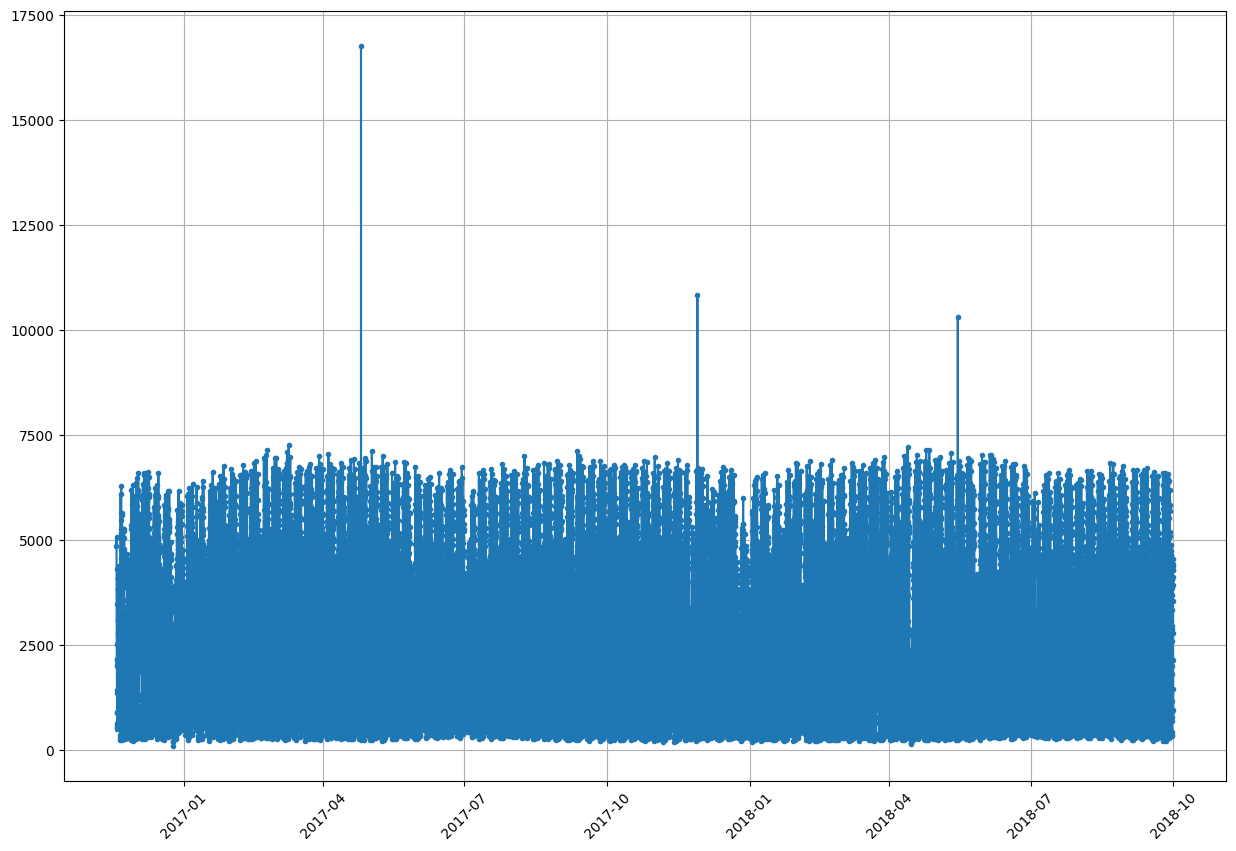

In [58]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15,10))
plt.plot(ts_df.index,ts_df['traffic_volume'], marker='.')
plt.xticks(rotation=45)
plt.grid(True)

In [59]:
df

,traffic_volume,temp,rain_1h,clouds_all,date_time
4628,4872.0,274.08,0.0,90,2016-11-18 15:00:00
3867,5074.0,273.84,0.0,90,2016-11-18 16:00:00
6235,4328.0,273.62,0.0,90,2016-11-18 17:00:00
2646,3486.0,273.59,0.0,90,2016-11-18 18:00:00
2062,2524.0,273.58,0.0,90,2016-11-18 19:00:00
...,...,...,...,...,...
6605,3543.0,283.45,0.0,75,2018-09-30 19:00:00
14241,2781.0,282.76,0.0,90,2018-09-30 20:00:00
9500,2159.0,282.73,0.0,90,2018-09-30 21:00:00
15201,1450.0,282.09,0.0,90,2018-09-30 22:00:00


## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [60]:
df.isnull().sum()

,0
traffic_volume,15
temp,0
rain_1h,0
clouds_all,0
date_time,0


In [61]:
df.duplicated().sum()

0

In [62]:
df.drop_duplicates(inplace=True)

In [63]:
df.dropna(inplace=True)

In [64]:
df['traffic_volume'].unique()

array([4872., 5074., 4328., ..., 1359., 2036., 1826.])

In [65]:
ts_df['traffic_volume'].fillna(method='ffill', inplace=True)

<ipython-input-65-2f4b0de4d784>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts_df['traffic_volume'].fillna(method='ffill', inplace=True)


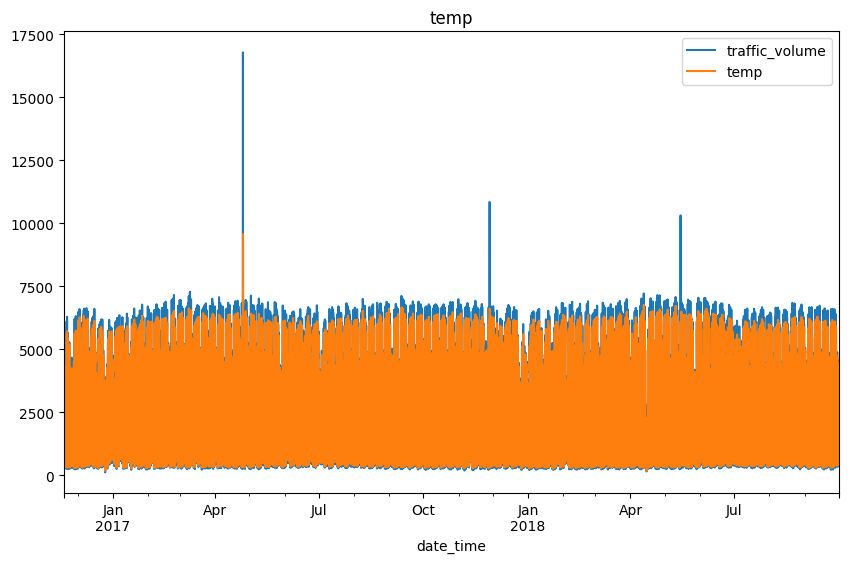

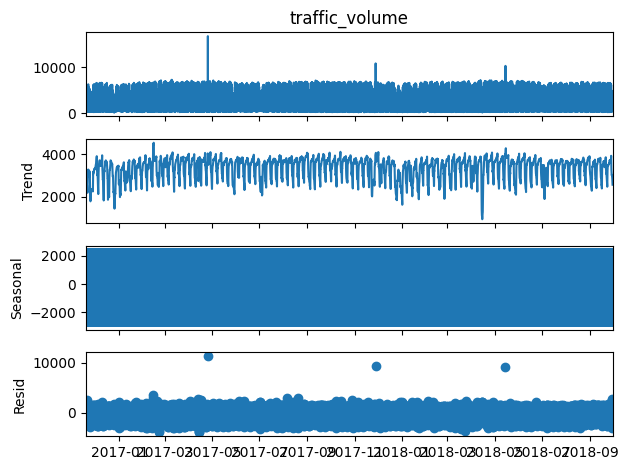

In [66]:
ts_df['temp'] = ts_df['traffic_volume'].rolling(window=3).mean()
ts_df[['traffic_volume', 'temp']].plot(figsize=(10, 6))
plt.title('temp')
plt.show()


from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_df['traffic_volume'], model='additive')
decomposition.plot()
plt.show()

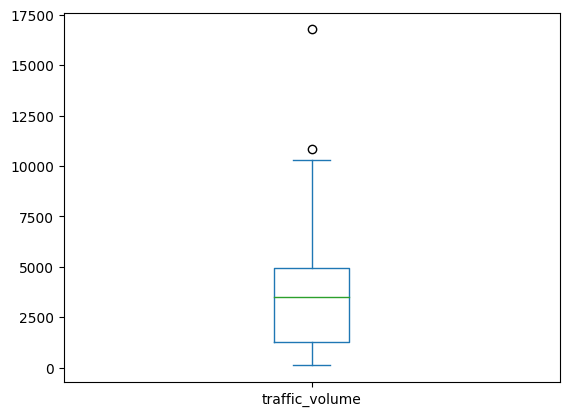

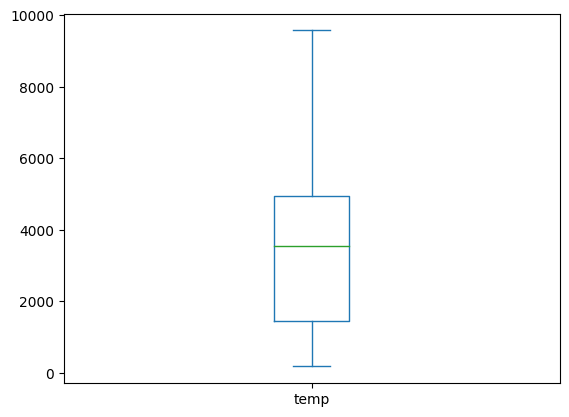

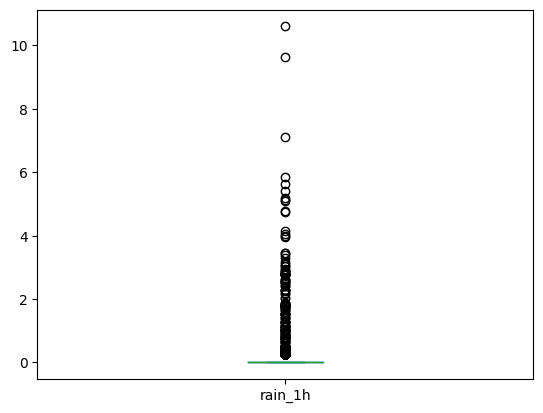

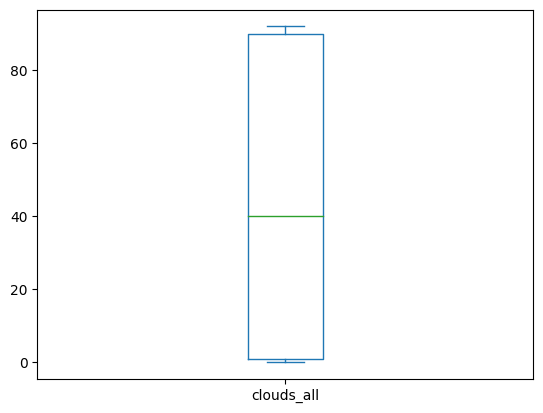

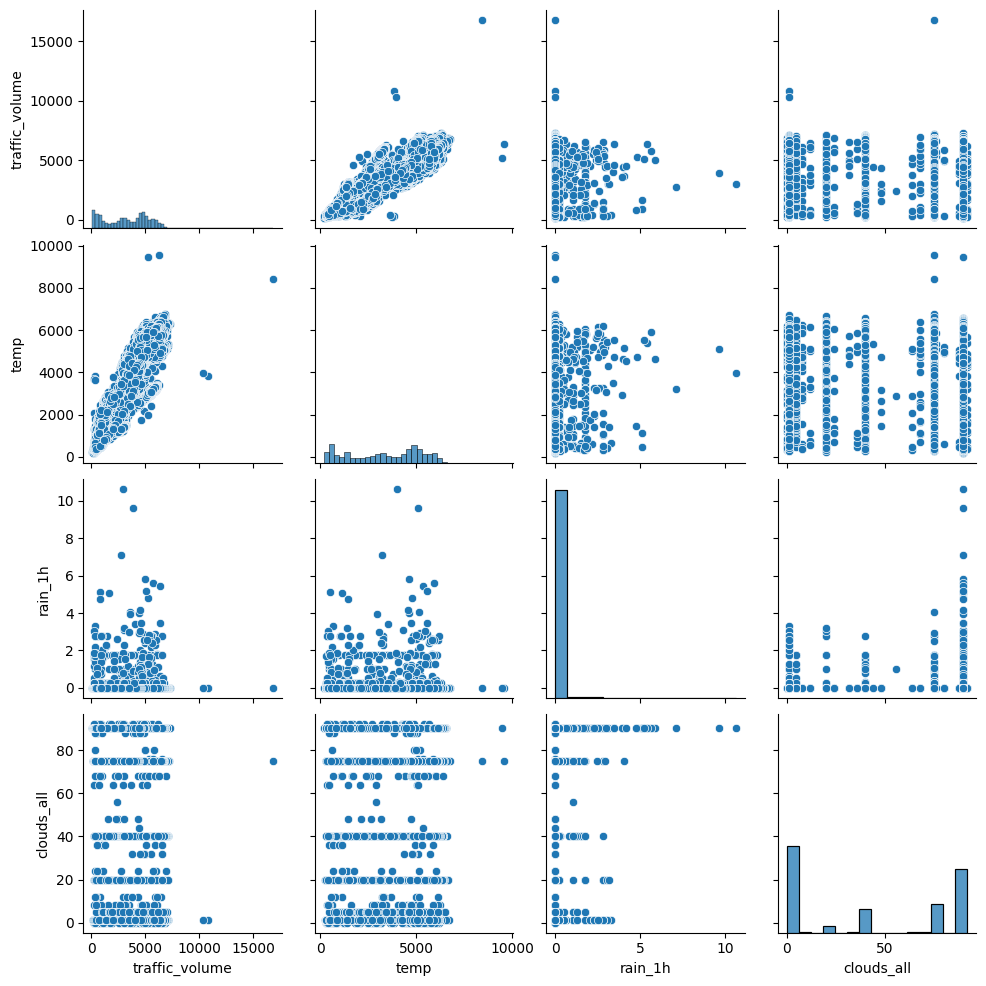

In [67]:
for i in ts_df.select_dtypes(include=['int64', 'float64']).columns:
    ts_df[i].plot(kind='box')
    plt.show()

import seaborn as sns
sns.pairplot(ts_df)

In [68]:
ts_df.duplicated().sum()
ts_df.drop_duplicates(inplace=True)

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [69]:
lags = []
for i in range(1, 6):
    ts_df[f'Lag_{i}'] = ts_df['traffic_volume'].shift(i)
    lags.append(f'Lag_{i}')


ts_df.dropna(inplace=True)

In [70]:
ts_df

,traffic_volume,temp,rain_1h,clouds_all,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
date_time,,,,,,,,,
2016-11-18 20:00:00,2027.0,2679.000000,0.0,90.0,2524.0,3486.0,4328.0,5074.0,4872.0
2016-11-18 21:00:00,2160.0,2237.000000,0.0,90.0,2027.0,2524.0,3486.0,4328.0,5074.0
2016-11-18 22:00:00,2012.0,2066.333333,0.0,90.0,2160.0,2027.0,2524.0,3486.0,4328.0
2016-11-18 23:00:00,1356.0,1842.666667,0.0,40.0,2012.0,2160.0,2027.0,2524.0,3486.0
2016-11-19 00:00:00,889.0,1419.000000,0.0,90.0,1356.0,2012.0,2160.0,2027.0,2524.0
...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,3543.0,3874.000000,0.0,75.0,3947.0,4132.0,4283.0,4302.0,4380.0
2018-09-30 20:00:00,2781.0,3423.666667,0.0,90.0,3543.0,3947.0,4132.0,4283.0,4302.0
2018-09-30 21:00:00,2159.0,2827.666667,0.0,90.0,2781.0,3543.0,3947.0,4132.0,4283.0


In [71]:
ts_df['Day_of_the_week']= ts_df.index.day_of_week
ts_df['Month'] = ts_df.index.month
ts_df['Day_of_the_year'] = ts_df.index.day_of_year

In [72]:
ts_df.isna().sum()
ts_df.dropna(inplace=True)

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [73]:
from sklearn.model_selection import train_test_split

X = ts_df.drop(columns=['traffic_volume'])
y = ts_df['traffic_volume']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42,test_size=0.2,shuffle=False)

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [100]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler


mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)
y_train = mms.fit_transform(y_train)
y_test = mms.transform(y_test)


## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [26]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 76.9 MB/s eta 0:00:00


### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [122]:
from pmdarima import auto_arima


stepwise_fit = auto_arima(ts_df['traffic_volume'], start_p = 1, start_q = 1,
                        max_p = 5, max_q = 5, m = 12,
                        start_P = 1, seasonal = True,
                        d = None, D = None, trace = True,
                        suppress_warnings = True,
                        stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=253484.613, Time=90.62 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=292679.554, Time=0.38 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=261278.019, Time=39.68 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=273156.346, Time=27.67 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=314569.359, Time=0.18 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=257753.950, Time=50.93 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=256772.576, Time=53.76 sec
 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=251197.839, Time=111.68 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=251012.324, Time=110.28 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=260938.871, Time=88.44 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=252718.299, Time=52.50 sec
 ARIMA(2,0,1)(2,0,0)[12] intercept   : AIC=250399.832, Time=117.88 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=254898.036, Time=65.47 sec
 ARIMA(2,0,1)(2,0,1)[12] intercept   : AIC=250

In [127]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                16245
Model:             SARIMAX(1, 0, 3)x(2, 0, [1, 2], 12)   Log Likelihood             -124919.401
Date:                                 Sun, 25 Aug 2024   AIC                         249858.802
Time:                                         18:51:56   BIC                         249935.757
Sample:                                              0   HQIC                        249884.235
                                               - 16245                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    463.6538     35.657     13.003      0.000     393.767     533.541
ar.L1          0.5419      0.014     37.551      0.000       0.514       0.570
ma.L1          0.6452      0.014     45.034      0.000       0.617       0.673
ma.L2          0.3897      0.017     22.961      0.000       0.356       0.423
ma.L3          0.1444      0.013     11.011      0.000       0.119       0.170
ar.S.L12      -0.1088      0.011     -9.729      0.000      -0.131      -0.087
ar.S.L24       0.8078      0.009     92.814      0.000       0.791       0.825
ma.S.L12      -0.0028      0.013     -0.211      0.833      -0.029       0.023
ma.S.L24      -0.4577      0.008    -57.045      0.000      -0.473      -0.442
sigma2      2.795e+05    802.866    348.173      0.000    2.78e+05    2.81e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):           3609140.22
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        76.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [128]:
n_periods = len(X_test)
y_pred = stepwise_fit.predict(n_periods=n_periods, X=X_test, typ='levels').rename('Predictions')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

<Axes: >

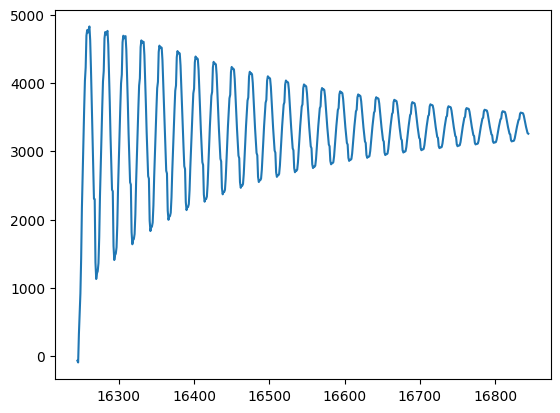

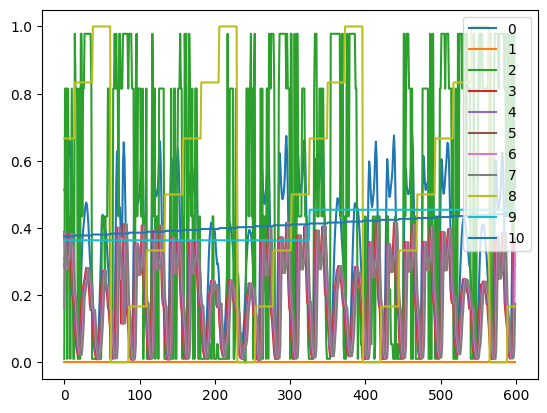

In [125]:
y_pred[:600].plot()
pd.DataFrame(y_test)[:600].plot()

In [132]:
print(y_test.shape)

(3249, 11)


In [131]:
print(y_pred.shape)

(3249,)


In [133]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

y_test_single = y_test[:]


print(mean_squared_error(y_pred,y_test))
print(rmse(y_pred,y_test))


ValueError: y_true and y_pred have different number of output (1!=11)

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [112]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense,Dropout,Input

from keras.callbacks import EarlyStopping

In [113]:
model_rnn = Sequential([
    Input(shape=(X_train.shape[1],1)),
    SimpleRNN(units=128, return_sequences=True),
    Dropout(0.25),

    SimpleRNN(units=64, return_sequences=True),
    Dropout(0.25),


    SimpleRNN(units=32),
    Dropout(0.25),

    Dense(units=1)
])

model_rnn.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_23 (SimpleRNN)            │ (None, 11, 128)             │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 11, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_24 (SimpleRNN)            │ (None, 11, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_25 (SimpleRNN)            │ (None, 32)                  │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,129 (125.50 KB)

 Trainable params: 32,129 (125.50 KB)

 Non-trainable params: 0 (0.00 B)

In [114]:
model_rnn.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])

In [115]:
early_stopping = EarlyStopping(monitor='val_loss',patience=10, restore_best_weights=True)

model_rnn.fit(X_train,y_train,epochs=2000,validation_split=0.2,callbacks=early_stopping)

Epoch 1/2000
325/325 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.2402 - mean_squared_error: 0.2402 - val_loss: 0.0488 - val_mean_squared_error: 0.0488
Epoch 2/2000
325/325 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0885 - mean_squared_error: 0.0885 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 3/2000
325/325 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0822 - mean_squared_error: 0.0822 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 4/2000
325/325 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0792 - mean_squared_error: 0.0792 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 5/2000
325/325 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0787 - mean_squared_error: 0.0787 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 6/2000
325/325 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0775 - mean_squared_error: 0.0775 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 7/2000
325/325 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0768 - mean_squared_error: 0.0768 

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [116]:
y_pred = model_rnn.predict(X_test)

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

<Axes: >

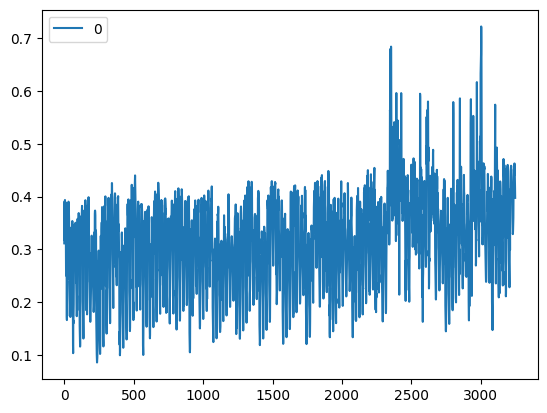

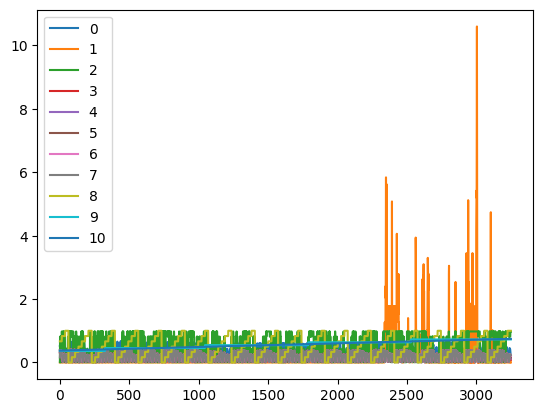

In [117]:
pd.DataFrame(y_pred).plot()
pd.DataFrame(y_test).plot()

In [107]:
print(y_pred.shape)

(3249, 1)


In [108]:
print(y_test.shape)

(3249, 11)


In [121]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

y_test_single = y_test[:, 0]

print(mean_squared_error(y_pred,y_test_single))
print(rmse(y_pred,y_test_single))

0.02362210390887242
[0.21965899 0.21361121 0.22499579 ... 0.09698389 0.14067779 0.1945915 ]


## Project Questions:

1. **Data Preprocessing**: Explain How you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

1. Data was preprocessed by handling missing values, normalizing features, and ensuring consistent time intervals.


2. Feature engineering included creating lag features and extracting date-related features to capture temporal patterns.


3. ARIMA and RNN models were chosen for their ability to model linear and complex temporal dependencies, respectively.


4. Training involved careful selection of batch size, epochs, and optimizer to ensure effective learning and prevent overfitting.


5. MSE and RMSE were used to measure forecasting accuracy, emphasizing the reduction of large errors.


6. Hyperparameter tuning and architectural adjustments were performed to enhance model performance.


7. Strategies like early stopping and dropout were implemented to mitigate overfitting in the RNN model.


8. Future improvements could include experimenting with advanced models, additional feature engineering, and deeper residual analysis.